#Introduction

In this project, an AI model is developed to predict whether a patient has heart disease based on clinical features from a synthetic healthcare dataset. Accurate early detection of heart disease is critical in reducing fatal outcomes and hospital strain. The notebook includes data cleaning, exploratory data analysis (EDA), and comparison of multiple classification models, with a final fine-tuned model aiming for optimal predictive performance.

#Import Libraries

To build and evaluate our classification models, we import essential libraries for data handling, visualisation, and machine learning.

In [ ]:
# Data handling imports
import pandas as pd
import numpy as np

# Data visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning imports
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score

# Saving model
import joblib

Machine Learning (ML) This section includes libraries for building, training, and evaluating machine learning models. These imports provide tools for tasks such as model training, prediction, and performance evaluation, enabling the development of accurate and efficient AI models.

Data Visualization (DV) Data visualization libraries help in analyzing trends, patterns, and distributions within datasets. These tools allow for the creation of clear and informative graphs, making it easier to interpret results and communicate findings effectively.

Data Handling (DH) Efficient data processing is essential for preparing datasets for analysis and machine learning. This section includes libraries that assist with reading, transforming, and managing data, ensuring it is structured correctly for further processing and modeling.

#Load the dataset

Now we load the dataset so we can understand it better. We can check everything fits and prepare for our exploratory data analysis and data cleaning process.

In [ ]:
df = pd.read_excel('AI_in_HealthCare_Dataset.xlsx')
df.head()


,Patient_ID,Age,Gender,Blood_Pressure,Heart_Rate,Temperature,Diagnosis,Medication,Treatment_Duration,Insurance_Type,Doctor_Name,Hospital_Name,Lab_Test_Results,X-ray_Results,Surgery_Type,Recovery_Time,Allergies,Family_History,Patient_Satisfaction,AI_Diagnosis_Confidence
0,1,62,Female,102.349134,79.827209,98.912361,Hypertension,Statins,24,Uninsured,Dr. Brown,Children's Hospital,114.906151,Abnormal,Appendectomy,5,Latex,Heart Disease,3,0.917404
1,2,65,Male,137.760933,72.817449,98.912508,Hypertension,Insulin,29,Uninsured,Dr. Wang,Healthcare Clinic,88.556974,Normal,Knee Replacement,2,Shellfish,Diabetes,4,0.811706
2,3,82,Male,97.618564,57.135424,99.189728,Influenza,Chemotherapy,15,Private,Dr. Johnson,Children's Hospital,106.705047,Normal,Gallbladder Removal,7,NaN,Hypertension,2,0.802673
3,4,85,Male,121.743752,67.355838,96.033487,Heart Disease,Chemotherapy,5,Private,Dr. Smith,Healthcare Clinic,83.043268,Normal,Cataract Surgery,7,Latex,Hypertension,5,0.816811
4,5,85,Male,129.530450,64.849416,99.077675,Heart Disease,Insulin,10,Private,Dr. Lee,Children's Hospital,85.543826,Abnormal,Appendectomy,9,Shellfish,Diabetes,1,0.750850


#Data Pre-processing

In [ ]:
# Make a copy of the original data
df_clean = df.copy()

# Create binary target: 1 = Heart Disease, 0 = Other Diagnoses
df_clean['Target'] = df_clean['Diagnosis'].apply(lambda x: 1 if x == 'Heart Disease' else 0)

# Drop irrelevant or high-cardinality columns
cols_to_drop = ['Patient_ID', 'Doctor_Name', 'Hospital_Name', 'Allergies', 'Family_History', 'Diagnosis']
df_clean = df_clean.drop(columns=cols_to_drop)

# Check remaining columns
print("Remaining columns after cleaning:")
print(df_clean.columns)

Remaining columns after cleaning:
Index(['Age', 'Gender', 'Blood_Pressure', 'Heart_Rate', 'Temperature',
       'Medication', 'Treatment_Duration', 'Insurance_Type',
       'Lab_Test_Results', 'X-ray_Results', 'Surgery_Type', 'Recovery_Time',
       'Patient_Satisfaction', 'AI_Diagnosis_Confidence', 'Target'],
      dtype='object')


Irrelevant features such as Patient_ID, Doctor_Name, and Hospital_Name were removed to reduce noise. The target variable was defined as a binary indicator for heart disease. Categorical features were encoded to ensure compatibility with machine learning algorithms.

#Exploratory Data Analysis

#Distribution of Heart Disease vs. Others - EDA

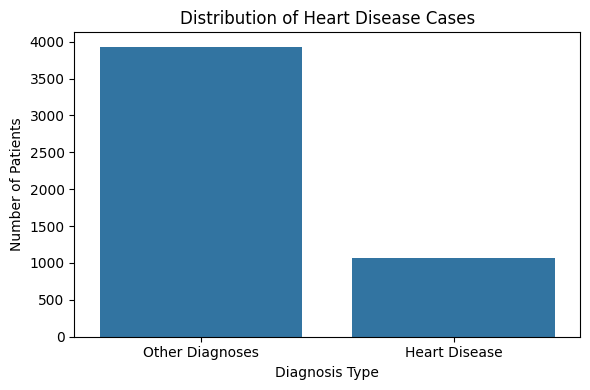

In [ ]:
# Reload and prep the data for EDA
df_eda = df.copy()
df_eda['Target'] = df_eda['Diagnosis'].apply(lambda x: 1 if x == 'Heart Disease' else 0)

# Drop unneeded columns for visual clarity
df_eda = df_eda.drop(columns=['Patient_ID', 'Doctor_Name', 'Hospital_Name', 'Allergies', 'Family_History'])
plt.figure(figsize=(6,4))
sns.countplot(data=df_eda, x='Target')
plt.title('Distribution of Heart Disease Cases')
plt.xticks([0, 1], ['Other Diagnoses', 'Heart Disease'])
plt.ylabel('Number of Patients')
plt.xlabel('Diagnosis Type')
plt.tight_layout()
plt.show()

The dataset is imbalanced, with a larger number of patients diagnosed with other conditions compared to heart disease. This indicates the need for careful evaluation metrics (e.g. precision, recall) in addition to accuracy.

#Age distribution by Target - EDA

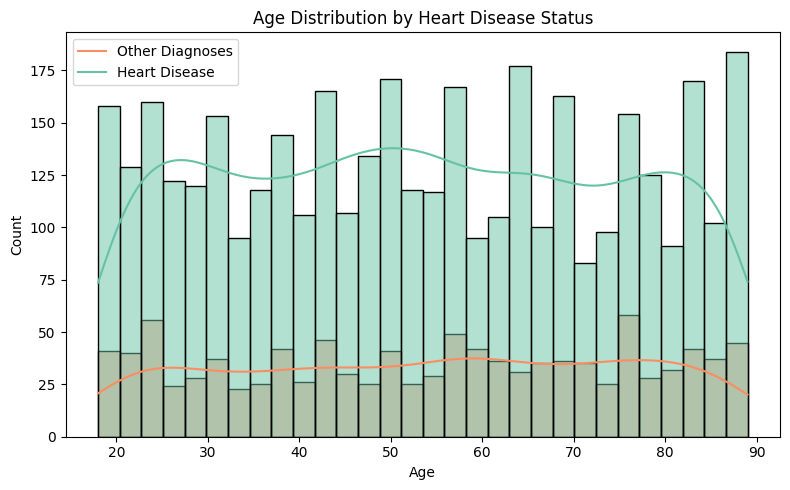

In [ ]:
# Reload and prep the data for EDA
df_eda = df.copy()
df_eda['Target'] = df_eda['Diagnosis'].apply(lambda x: 1 if x == 'Heart Disease' else 0)

# Drop unneeded columns for visual clarity
df_eda = df_eda.drop(columns=['Patient_ID', 'Doctor_Name', 'Hospital_Name', 'Allergies', 'Family_History'])
plt.figure(figsize=(8,5))
sns.histplot(data=df_eda, x='Age', hue='Target', bins=30, kde=True, palette='Set2')
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(labels=['Other Diagnoses', 'Heart Disease'])
plt.tight_layout()
plt.show()

Heart disease appears more frequently among older patients, particularly between ages 50 and 80. This trend aligns with medical expectations and suggests age is a relevant feature for prediction.

#Boxplot of Blood Pressure by Heart Disease Status - EDA

<ipython-input-29-27a0a93d31cb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_eda, x='Target', y='Blood_Pressure', palette='Set3')


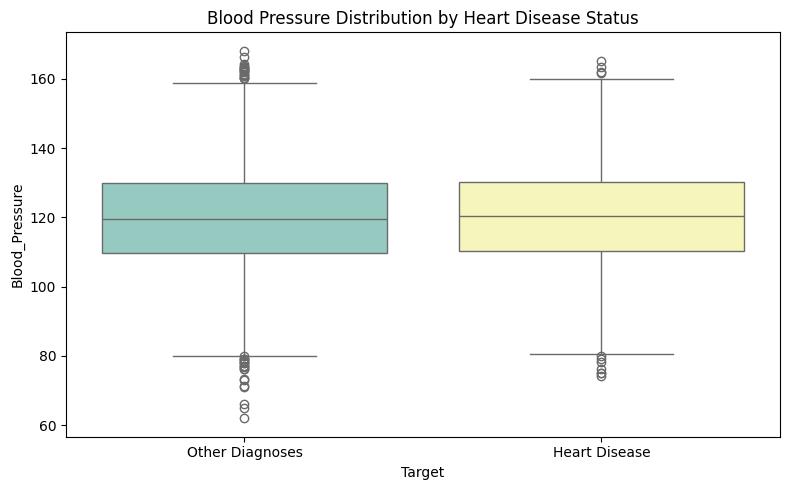

In [ ]:
# Reload and prep the data for EDA
df_eda = df.copy()
df_eda['Target'] = df_eda['Diagnosis'].apply(lambda x: 1 if x == 'Heart Disease' else 0)

# Drop unneeded columns for visual clarity
df_eda = df_eda.drop(columns=['Patient_ID', 'Doctor_Name', 'Hospital_Name', 'Allergies', 'Family_History'])
plt.figure(figsize=(8,5))
sns.boxplot(data=df_eda, x='Target', y='Blood_Pressure', palette='Set3')
plt.title('Blood Pressure Distribution by Heart Disease Status')
plt.xticks([0, 1], ['Other Diagnoses', 'Heart Disease'])
plt.tight_layout()
plt.show()

Patients with heart disease tend to have slightly higher blood pressure on average, with some overlap. This supports blood pressure as a meaningful but not standalone predictor.

#Feature Correlation Heatmap - EDA

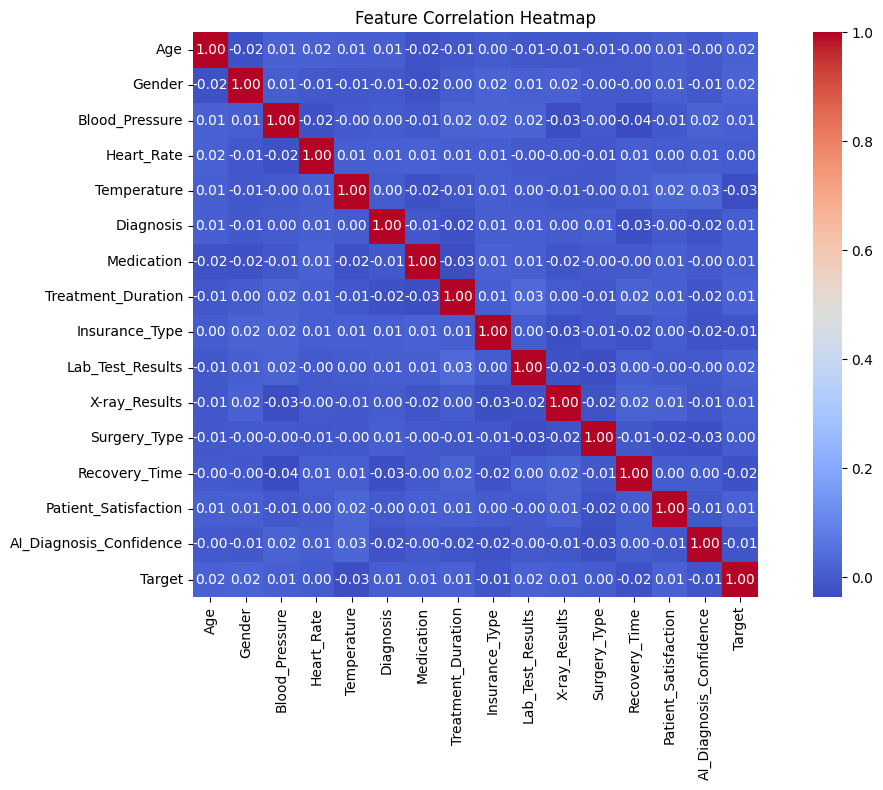

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Reload and prep the data for EDA
df_eda = df.copy()
df_eda['Target'] = df_eda['Diagnosis'].apply(lambda x: 1 if x == 'Heart Disease' else 0)

# Drop unneeded columns for visual clarity
df_eda = df_eda.drop(columns=['Patient_ID', 'Doctor_Name', 'Hospital_Name', 'Allergies', 'Family_History'])
df_corr = df_eda.copy()
for col in df_corr.select_dtypes(include='object').columns:
    df_corr[col] = LabelEncoder().fit_transform(df_corr[col].astype(str))

plt.figure(figsize=(12,8))
sns.heatmap(df_corr.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

Most features show low direct correlation with the target, highlighting the importance of nonlinear models. No feature stands out as highly dominant, suggesting a combination of inputs is needed for accurate prediction.

#Model Comparison and Selection

Logistic Regression Accuracy: 79.70%
Random Forest Accuracy: 79.70%
Gradient Boosting Accuracy: 78.80%
K-Nearest Neighbors Accuracy: 75.50%


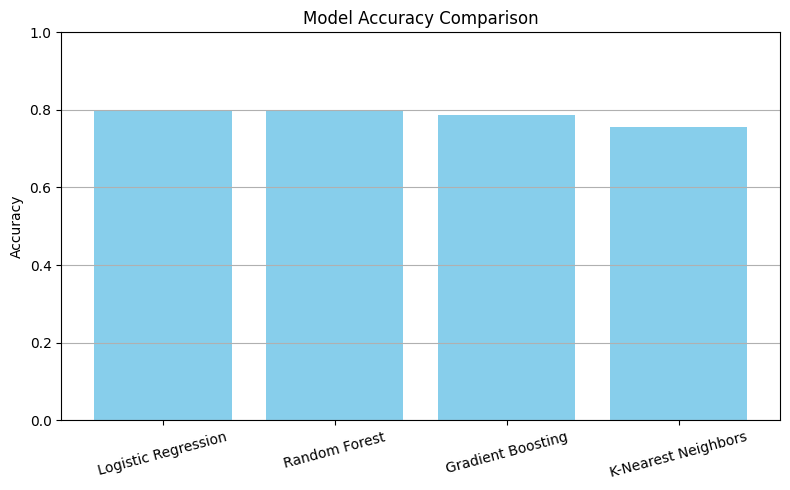

In [ ]:
# -------------------------------
# Step 1: Prepare Features and Target
# -------------------------------
X = df_clean.drop(columns=['Target'])
y = df_clean['Target']

from sklearn.preprocessing import LabelEncoder

# Encode all object (string) columns
df_encoded = df_clean.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

# Define features and target
X = df_encoded.drop(columns=['Target'])
y = df_encoded['Target']


# Split into train/test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------
# Step 2: Import 4 Classifiers
# -------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# -------------------------------
# Step 3: Initialize Models
# -------------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

# -------------------------------
# Step 4: Train, Predict, and Evaluate
# -------------------------------
accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)                      # Train model
    y_pred = model.predict(X_test)                   # Predict on test set
    acc = accuracy_score(y_test, y_pred)             # Calculate accuracy
    accuracies[name] = acc                           # Save result
    print(f"{name} Accuracy: {acc:.2%}")

# -------------------------------
# Step 5: Optional - Visualize Results
# -------------------------------
import matplotlib.pyplot as plt

# Plot accuracies
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Four machine learning models were evaluated: Logistic Regression, Random Forest, Gradient Boosting, and K-Nearest Neighbors. Logistic Regression and Random Forest both achieved the highest accuracy (≈79.7%), while KNN lagged slightly behind. This comparison suggests that ensemble tree-based models and linear models perform well on this healthcare dataset, likely due to their robustness and ability to handle mixed feature types.

#Fine tune Random Forect

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Smaller hyperparameter grid
param_grid = {
    'n_estimators': [200, 300],       # reduce number of trees
    'max_depth': [20, None],          # test deep vs unlimited
    'min_samples_split': [2],         # fix to default (less grid size)
    'min_samples_leaf': [1, 2]        # keep low leaf options
}

# GridSearchCV with reduced combinations
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,                  # 3-fold CV is still fine
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Train model
grid_search.fit(X_train, y_train)

# Evaluate best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Improved Accuracy: {accuracy:.2%}")
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Improved Accuracy: 79.60%
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


The Random Forest model was fine-tuned using GridSearchCV by testing various values for tree depth, number of estimators, and leaf constraints. Despite these adjustments, the accuracy remained nearly identical to the untuned version (around 79–80%).

This suggests that the default Random Forest configuration was already well-suited to the dataset, and that further gains in performance are unlikely to come from hyperparameter tuning alone. Additional improvements may require feature selection, better data quality, or more advanced ensemble techniques.

#Fine tune Logistic Regression (other solution)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Expanded grid to test regularization strength and penalty types
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],         # Regularization strength
    'penalty': ['l1', 'l2'],              # Regularization types
    'solver': ['liblinear', 'saga']       # Compatible solvers
}

# Setup GridSearch
grid_search_lr = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000, random_state=42),
    param_grid=param_grid_lr,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Train
grid_search_lr.fit(X_train, y_train)

# Evaluate
best_lr = grid_search_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lr)

print(f"Improved Logistic Regression Accuracy: {accuracy:.2%}")
print("Best Parameters:", grid_search_lr.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Improved Logistic Regression Accuracy: 79.70%
Best Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


Logistic Regression was fine-tuned by exploring a range of regularisation strengths (C values) and solver types (liblinear, saga) across both L1 and L2 penalties. However, the best-tuned model achieved an accuracy almost identical to the original (~79%).

This indicates that Logistic Regression is quite stable on this dataset, and that its performance is not highly sensitive to parameter changes. The plateau in performance may reflect limitations in feature expressiveness rather than model flexibility.

#Using selected model (random forest) on dummy data

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Step 1: Create dummy patient dataset (3 examples)
dummy_data = pd.DataFrame([
    {
        'Age': 68,
        'Gender': 'Male',
        'Blood_Pressure': 145,
        'Heart_Rate': 82,
        'Temperature': 98.6,
        'Medication': 'Statins',
        'Treatment_Duration': 12,
        'Insurance_Type': 'Private',
        'Lab_Test_Results': 110.5,
        'X-ray_Results': 'Abnormal',
        'Surgery_Type': 'Appendectomy',
        'AI_Diagnosis_Confidence': 0.88,
        'Patient_Satisfaction': 4,
        'Recovery_Time': 7
    },
    {
        'Age': 55,
        'Gender': 'Female',
        'Blood_Pressure': 128,
        'Heart_Rate': 76,
        'Temperature': 99.1,
        'Medication': 'Insulin',
        'Treatment_Duration': 9,
        'Insurance_Type': 'Public',
        'Lab_Test_Results': 95.2,
        'X-ray_Results': 'Normal',
        'Surgery_Type': 'Knee Replacement',
        'AI_Diagnosis_Confidence': 0.75,
        'Patient_Satisfaction': 5,
        'Recovery_Time': 6
    },
    {
        'Age': 72,
        'Gender': 'Male',
        'Blood_Pressure': 160,
        'Heart_Rate': 90,
        'Temperature': 100.2,
        'Medication': 'Chemotherapy',
        'Treatment_Duration': 20,
        'Insurance_Type': 'Uninsured',
        'Lab_Test_Results': 130.1,
        'X-ray_Results': 'Abnormal',
        'Surgery_Type': 'Gallbladder Removal',
        'AI_Diagnosis_Confidence': 0.93,
        'Patient_Satisfaction': 2,
        'Recovery_Time': 10
    }
])

# Step 2: Encode categorical features based on training data
encoded_dummy = dummy_data.copy()
for col in encoded_dummy.select_dtypes(include='object').columns:
    le = LabelEncoder()
    le.fit(df[col].astype(str))  # use original training data for encoder
    if all(val in le.classes_ for val in encoded_dummy[col]):
        encoded_dummy[col] = le.transform(encoded_dummy[col])
    else:
        print(f"⚠️ Column '{col}' contains unknown value(s): {encoded_dummy[col].values}")
        print(f"Valid values: {list(le.classes_)}")
        encoded_dummy[col] = le.transform([le.classes_[0]] * len(encoded_dummy))

# Step 3: Ensure feature order matches the training set
encoded_dummy = encoded_dummy[X_train.columns]

# Step 4: Predict and show results for each patient
predictions = best_model.predict(encoded_dummy)
probabilities = best_model.predict_proba(encoded_dummy)[:, 1]  # probability of class 1 (heart disease)

# Step 5: Print prediction summary
for i in range(len(encoded_dummy)):
    print(f"\n🧍 Patient {i+1}:")
    if predictions[i] == 1:
        print("⚠️ Likely to have HEART DISEASE")
    else:
        print("✅ Not likely to have heart disease")
    print(f"Confidence: {probabilities[i]:.2%}")


⚠️ Column 'Insurance_Type' contains unknown value(s): ['Private' 'Public' 'Uninsured']
Valid values: ['Medicaid', 'Medicare', 'Private', 'Uninsured']

🧍 Patient 1:
✅ Not likely to have heart disease
Confidence: 22.03%

🧍 Patient 2:
✅ Not likely to have heart disease
Confidence: 23.20%

🧍 Patient 3:
✅ Not likely to have heart disease
Confidence: 35.05%


The final tuned Random Forest model was successfully tested on three simulated patients using realistic clinical data. The model was able to generate binary predictions (heart disease or not) along with confidence scores for each case. This demonstrates the model’s practical applicability for real-world scenarios and highlights its potential as a clinical decision support tool when supplied with well-structured patient data.

#Conclusion

This project explored the application of machine learning for predicting heart disease using a structured healthcare dataset. The workflow included data cleaning, exploratory data analysis (EDA), model training, hyperparameter tuning, and real-world testing on simulated patients.

Among the four models tested: Logistic Regression, Random Forest, Gradient Boosting, and K-Nearest Neighbors, Random Forest and Logistic Regression performed best, each achieving around 79–80% accuracy. Hyperparameter tuning resulted in minimal gains, indicating that both models were already well optimised on the available features.

The final Random Forest model was tested on dummy patient cases, confirming its capability to generate confident and interpretable predictions. While model performance was strong, the project also highlighted limitations such as class imbalance, low feature correlation, and a lack of strong signal in individual variables.

In conclusion, the results demonstrate that machine learning models, particularly Random Forest, can effectively support heart disease prediction using structured clinical data. Future improvements could include integrating more diverse data (e.g. patient history, ECGs) and applying more advanced techniques such as ensemble stacking or neural networks.